In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import numpy as np


In [58]:
# fashion mnist 데이터셋 불러오기
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# float32 형으로 변환하고 [0,1] 사이로 정규화하기 위해 255로 나눔
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

# Simple Auto-Encoder
# 1개의 조밀층을 hidden layer를 갖는 기본적인 오토인코더 모델
# [입력층 (28x28), 은닉 조밀층(latent_dim), 출력층 (28x28)로 구성]

#hidden layer의 node 개수 (폭)
latent_dim = 512


(60000, 28, 28)
(10000, 28, 28)


In [59]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__() #상위 클래스 Model 클래스의 init 함수
        self.latent_dim = latent_dim    # hidden( bottleneck) layer의 dimension 받아오기
        
        # Encoder 모델
        self.encoder = tf.keras.Sequential([ # 시퀀셜 모델 사용
            layers.Flatten(),               # 일자로 쭉 편다. 입력 벡터화
            layers.Dense(latent_dim, activation='relu') #relu함수 활성화
        ])
        
        # Decoder 모델
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),    #다시 입력 영상크기 (28x28 = 784) 만큼의 노드 수
            layers.Reshape((28,28))
        ])
    
    def call(self, x):      # 모델에 데이터 통과시켜서 결과 생성
        encoded = self.encoder(x)   # 입력 x를 encoder에 통과
        decoded = self.decoder(encoded)     # encoder 결과를 decoder에 통과
        return decoded
    
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError()) # adam optimizer, MSE error로 컴파일


In [60]:
autoencoder.fit(X_train, X_train, #나 자신을 복원 입력. 입출력이 동일
                epochs = 10,
                shuffle = True, #데이터 순서 섞기
                validation_data = (X_test,X_test)) # validation Error 계산시 사용할 data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0255 - val_loss: 0.0059
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0017 - val_loss: 0.0017


In [41]:
print('autoencoder.summary')
print(autoencoder.summary())
print()

print('autoencoder.encoder.summary')
print(autoencoder.encoder.summary())
print()

print('autoencoder.decoder.summary')
print(autoencoder.decoder.summary())
print()

autoencoder.summary


Model: "autoencoder_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ ?                      │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ ?                      │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303,602 (1.16 MB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,402 (790.64 KB)

None

autoencoder.encoder.summary


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 64)               │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None

autoencoder.decoder.summary


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (32, 784)              │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (32, 28, 28)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

None



In [51]:
encoded_imgs = autoencoder.encoder(X_test).numpy()      # Encoding(latent space의 벡터화 시킨) 결과
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()       #Decoding(원본 복원) 결과

decoded_imgs=autoencoder(X_test)

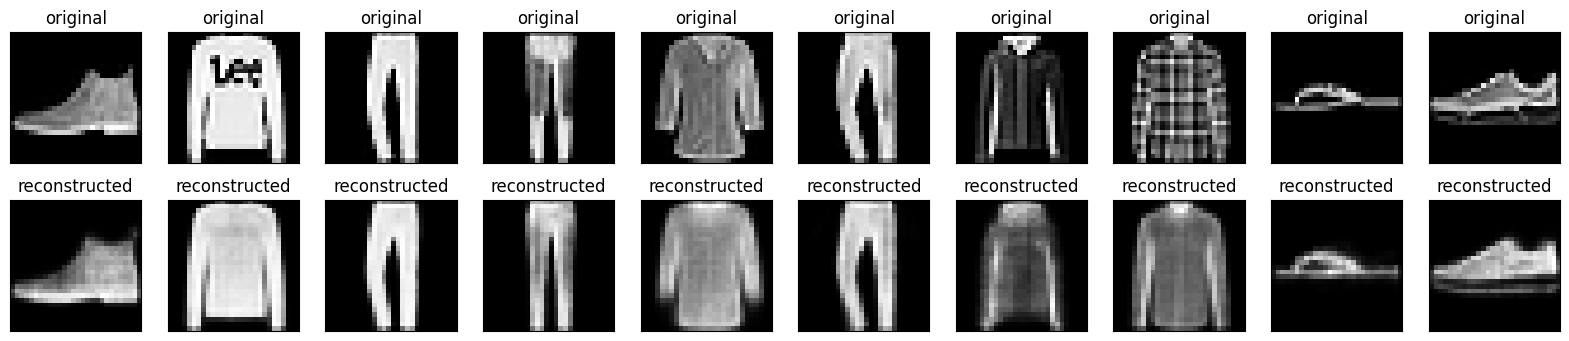

In [54]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1) # (2, n) 그리고 상의 i+1 번째에 그리기
    plt.imshow(X_test[i]) # i번째 test 영상 샘플 그리기
    plt.title("original") # 원본태그달기
    plt.gray()      #흑백으로
    ax.get_xaxis().set_visible(False) # x축 감추기
    ax.get_yaxis().set_visible(False) # y축 감추기
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [56]:
# Denoising AutoEncoder
# a. 영상에 noise를 더해서 noise 영상, noise 삽입 전의 원본을 clean 영상으로 하여 학습해 보자.
# b. 잡음의 세기 및 latent_dim에 따른 변화를 관찰해 보자.

noise_std = 0.1   # noise strength (0, 1)
x_train_nz = X_train + np.random.normal(0, noise_std, np.shape(X_train))
x_test_nz = X_test + np.random.normal(0, noise_std, np.shape(X_test))

denoising_autoencoder = Autoencoder(latent_dim)     # latent_dim을 인자로 하여 AutoEncoder 모델 생성
denoising_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())   # adam optimizer, MSE error로 모델을 컴파일
denoising_autoencoder.fit(x_train_nz, X_train,                        # noise 입력, clean 출력            
                                                                                 
                epochs=10,                                                        # 10 Epoch 수행
                shuffle=True,                                                     # Data 순서 섞기
                validation_data=(x_test_nz, X_test))                              # validation Error 계산 시 사용할 data

# encoded_imgs2 = denoising_autoencoder.encoder(x_test_nz).numpy()                  # Encoding 결과 (latent space의 벡터 표현)
# decoded_imgs2 = denoising_autoencoder.decoder(encoded_imgs2).numpy()              # Decoding (원본 복원) 결과
decoded_imgs2=denoising_autoencoder(x_test_nz)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0391 - val_loss: 0.0137
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0128 - val_loss: 0.0115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097 - val_loss: 0.0098


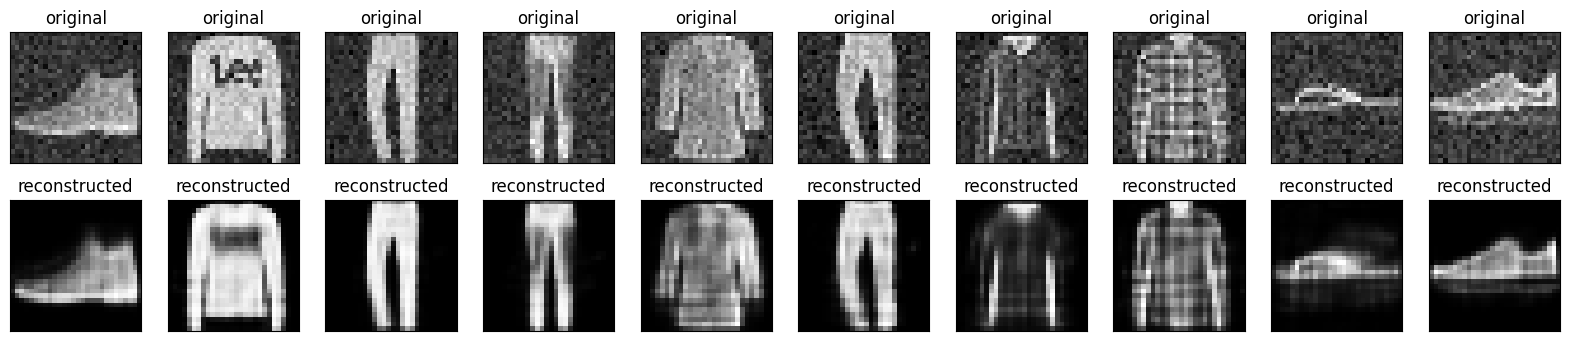

In [57]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)     # (2, n) 그리드 상의 i+1번째에 그리기
  plt.imshow(x_test_nz[i])          # i번째 test 영상 샘플 그리기
  plt.title("original")             # 원본 태그 달기
  plt.gray()                        # 흑백으로 그리기
  ax.get_xaxis().set_visible(False) # x축 감추기
  ax.get_yaxis().set_visible(False) # y축 감추기

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n) # (2, n) 그리드 상의 i+n+1번째 (둘째 줄 같은 컬럼)에 그리기
  plt.imshow(decoded_imgs2[i])      # i번째 decoded_img (복원 결과) 그리기
  plt.title("reconstructed")        # 복원 태그 달기
  plt.gray()                        # 흑백으로 그리기
  ax.get_xaxis().set_visible(False) # x축 감추기
  ax.get_yaxis().set_visible(False) # y축 감추기
plt.show()                          # 구성한 Figure를 보이기